In [2]:
import csv
import astropy
from astropy.io import fits
from astropy.table import Table
import matplotlib.pylab as plt
import numpy as np
import scipy.interpolate
from scipy.interpolate import splev, splrep
import pandas as pd
from matplotlib import rc
from matplotlib import colors
import seaborn as sns
sns.set()

## Task
The European Space Agency’s (ESO) Gaia space mission has provided an unprecedented catalog of over 1 Billion star positions and brightnesses. A subset of those have been collected into the Gaia Catalog of Nearby stars, containing about 300,000 stars within 100 pc. Download the Gaia Catalog of Nearby Stars and make a four panel plot that shows a Color-Color diagram in each panel. An HR diagram is a specific type of a color-color diagram, which is similar to a color-magnitude diagram. The panels should be distinct in that each uses a different filter in order to eliminate 25-75% of the data points. You can use subsets of the data that is plotted or data quality metrics (by this I mean use parameter uncertainties to choose your subsets). Each panel should be related to stellar populations or the importance of the quality of data.


In [3]:
# opening the csv file by specifying
# the location
# with the variable name as csv_file
with open('1676601707932O-result.csv') as csv_file:
 
    # creating an object of csv reader
    # with the delimiter as ,
    csv_reader = csv.reader(csv_file, delimiter = ',')
 
    # list to store the names of columns
    list_of_column_names = []
 
    # loop to iterate through the rows of csv
    for row in csv_reader:
 
        # adding the first row
        list_of_column_names.append(row)
 
        # breaking the loop after the
        # first iteration itself
        break

#printing the result
print("List of column names : ",
      list_of_column_names[0])


List of column names :  ['source_id', 'ra', 'dec', 'ra_error', 'dec_error', 'parallax', 'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'phot_g_mean_mag', 'phot_g_mean_flux_over_error', 'phot_bp_mean_mag', 'phot_bp_mean_flux_over_error', 'phot_rp_mean_mag', 'phot_rp_mean_flux_over_error', 'phot_bp_rp_excess_factor', 'gcns_prob', 'gmag_gunn', 'rmag_gunn', 'imag_gunn', 'zmag_gunn']


In [18]:
data = pd.read_csv("1676601707932O-result.csv")
data
#the units of parallax is in milliarcsec (e-3)

,source_id,ra,dec,ra_error,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,phot_bp_rp_excess_factor,gcns_prob,gmag_gunn,rmag_gunn,imag_gunn,zmag_gunn
0,1964476435852285184,321.735456,38.801855,0.050454,0.057418,14.072027,0.075078,107.990490,0.065867,-15.926827,...,17.940834,17.978176,15.217005,61.494030,1.996316,1.0,NaN,17.4995,16.0407,15.0943
1,1964476431552960384,321.734846,38.802808,0.126180,0.181940,14.237829,0.202138,104.959220,0.180259,-13.734642,...,19.583742,7.423220,16.809708,21.262344,2.792587,1.0,NaN,NaN,NaN,NaN
2,1964512169975479296,320.937184,38.806020,0.104571,0.129337,10.154621,0.161834,55.609960,0.153671,42.290260,...,21.101280,9.161299,17.232220,160.151140,1.650788,1.0,21.4980,20.1920,17.9471,16.9498
3,1964898236001726080,320.330203,38.757388,0.050593,0.056247,13.506319,0.071914,64.893074,0.065706,55.216976,...,15.138133,747.149800,12.814347,1454.548200,1.428969,1.0,15.5341,14.3039,13.3800,12.8610
4,1964527838022391296,321.356407,39.019354,0.023402,0.027118,12.526404,0.035193,100.921200,0.032498,62.198406,...,17.472920,65.465770,14.611793,225.508300,1.544308,1.0,17.7712,16.5970,15.1491,14.4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331307,5047766932892879872,45.204368,-35.866896,0.096150,0.122824,9.916632,0.155012,-101.275500,0.114867,-70.126180,...,20.920017,11.684330,17.312492,143.033280,1.719969,1.0,NaN,NaN,17.8450,16.6940
331308,5047781677516431232,45.325438,-35.681581,0.010722,0.013303,13.366490,0.017031,-37.643265,0.013171,-143.313100,...,14.134844,1333.879500,11.895823,2076.912800,1.378198,1.0,14.2670,13.3310,12.2120,11.7860
331309,5047777966664680960,45.451884,-35.592638,0.027083,0.033229,10.066502,0.043104,-38.311073,0.031756,-91.493690,...,18.196762,112.288506,15.294890,611.867300,1.473597,1.0,18.2120,17.2860,15.6240,14.9960
331310,5050790559805357184,45.021639,-35.516560,0.026152,0.032263,10.921551,0.043675,57.716373,0.032750,-36.295740,...,18.290630,86.397980,15.250525,439.305180,1.496324,1.0,18.4480,17.4500,15.6520,14.9170


In [29]:
data.describe()

,source_id,ra,dec,ra_error,dec_error,parallax,parallax_error,pmra,pmra_error,pmdec,...,phot_bp_mean_mag,phot_bp_mean_flux_over_error,phot_rp_mean_mag,phot_rp_mean_flux_over_error,phot_bp_rp_excess_factor,gcns_prob,gmag_gunn,rmag_gunn,imag_gunn,zmag_gunn
count,3.313120e+05,331312.000000,331312.000000,331312.000000,331312.000000,331312.000000,331312.000000,331312.000000,331312.000000,331312.000000,...,324330.000000,324330.000000,324687.000000,324687.000000,324307.000000,331312.000000,263541.000000,274707.000000,285227.000000,283902.000000
mean,3.489353e+18,181.944061,-0.448624,0.108930,0.100124,14.671292,0.138697,-1.535006,0.143632,-38.994803,...,16.087765,549.220582,13.716932,1039.510059,1.494419,0.988093,16.464817,15.597829,14.585078,14.030519
std,2.005928e+18,103.922148,39.171819,0.200693,0.184096,8.536880,0.260281,122.687024,0.270297,111.744389,...,3.670995,846.535730,3.082206,1105.032638,0.470175,0.061973,3.180347,3.077058,2.708522,2.523459
min,4.188882e+13,0.002565,-89.860932,0.004227,0.004828,8.000061,0.007861,-4406.469000,0.004648,-5817.800300,...,2.942152,0.276299,1.843503,0.372103,0.357891,0.380000,1.598150,5.809716,5.204759,4.297805
25%,1.769289e+18,91.193000,-30.616434,0.017032,0.015572,10.694451,0.021695,-52.835802,0.022031,-78.318574,...,14.028782,41.732520,11.875763,244.417950,1.319180,1.000000,14.713000,13.719000,12.984000,12.517000
50%,3.494889e+18,183.920707,-0.575300,0.034944,0.032178,12.293121,0.044570,-2.065861,0.045405,-28.673027,...,16.582878,208.120590,13.914438,708.393500,1.447610,1.000000,16.775000,15.780600,14.560000,13.934000
75%,5.242502e+18,272.237957,29.597134,0.100991,0.093618,15.593690,0.127580,49.293166,0.131352,11.104594,...,18.747757,694.070695,15.756837,1432.583450,1.545903,1.000000,18.570000,17.663100,16.340400,15.580700
max,6.917517e+18,359.999926,89.637596,3.530957,2.901521,768.066500,4.233253,6765.995000,3.274461,10362.395000,...,24.613297,87627.810000,21.036163,55172.402000,82.942010,1.000000,37.510780,30.886670,29.579220,33.838400


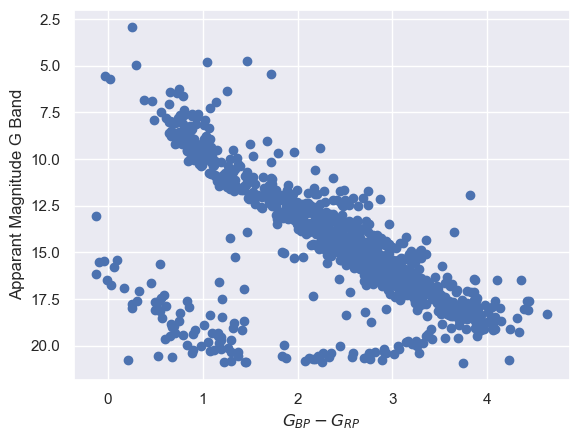

In [5]:
#this is just a test to get some initial idea 
bpmag = data['phot_bp_mean_mag']
rpmag = data['phot_rp_mean_mag']
G_bprp = bpmag - rpmag
# print(G_bprp)
plt.scatter(G_bprp[:1000], data['phot_g_mean_mag'][:1000])
plt.xlabel('$G_{BP} - G_{RP}$')
plt.ylabel('Apparant Magnitude G Band')
plt.gca().invert_yaxis()

## Details

Apparant Magnitude: how bright an object appears in the sky from Earth ==> the brighter an object appears, the lower its magnitude

$G_{BP}$: Blue photometry value ==> 330 to 680 nm

$G_{RP}$: Red photometry value ==> 640 to 1050 nm

Absolute Magnitude: apparent magnitude an object would have if it were located at a distance of 10 parsecs.

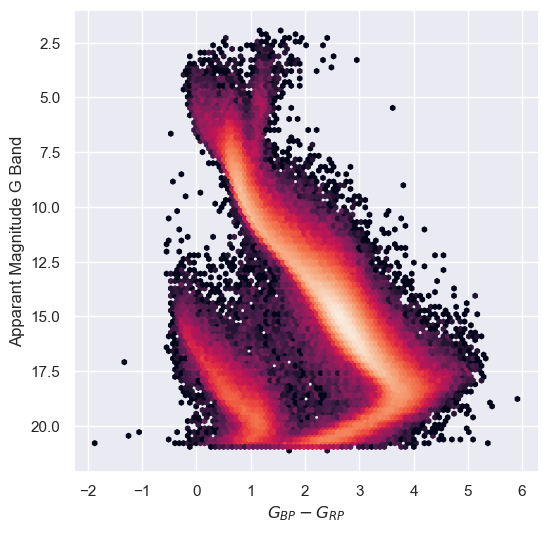

In [6]:
#density
#plotting the apparant magnitude in G band vs the G_bp - G_rp.
#this is for all of the data ==> all stars 
fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.hexbin(G_bprp[:], data['phot_g_mean_mag'][:], bins = 'log', mincnt = 1)
ax.set_xlabel('$G_{BP} - G_{RP}$')
ax.set_ylabel('Apparant Magnitude G Band')
ax.invert_yaxis()


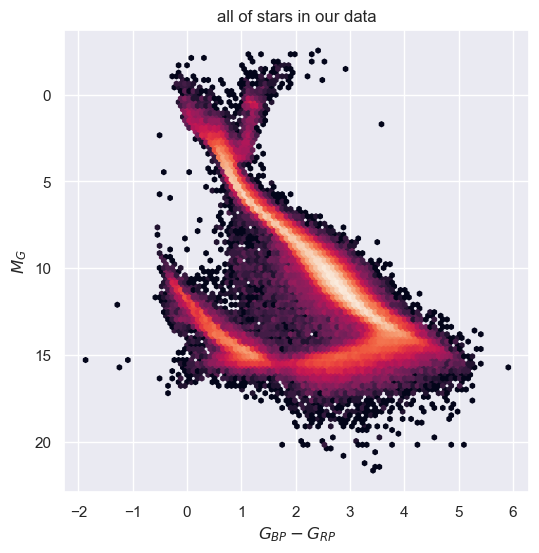

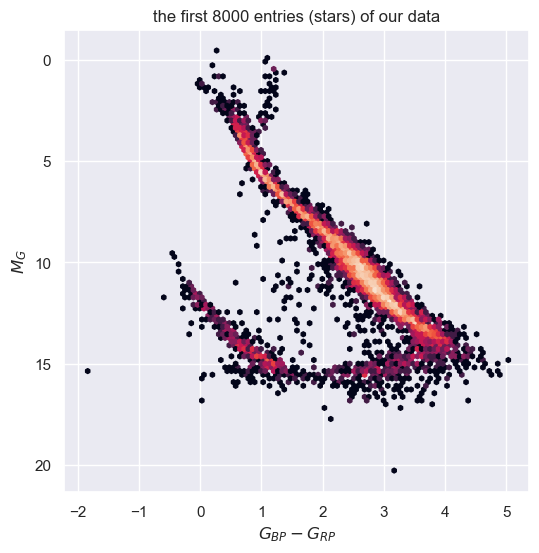

In [13]:
#get the absolute magnitude
#absolute magnitude formula: M = m + 5 log(parallax) -10
absmag = data['phot_g_mean_mag'] + 5 * np.log10(data['parallax']) - 10

fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.hexbin(G_bprp[:], absmag[:], bins = 'log', mincnt = 1)
ax.set_xlabel('$G_{BP} - G_{RP}$')
ax.set_ylabel('$M_{G}$')
ax.set_title('all of stars in our data')
ax.invert_yaxis()

fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.hexbin(G_bprp[:8000], absmag[:8000], bins = 'log', mincnt = 1)
ax.set_xlabel('$G_{BP} - G_{RP}$')
ax.set_ylabel('$M_{G}$')
ax.set_title('the first 8000 entries (stars) of our data')
ax.invert_yaxis()

## Details:
Green (g): wavelength at 4770 A

Near infrared (i): wavelength at 7625 A

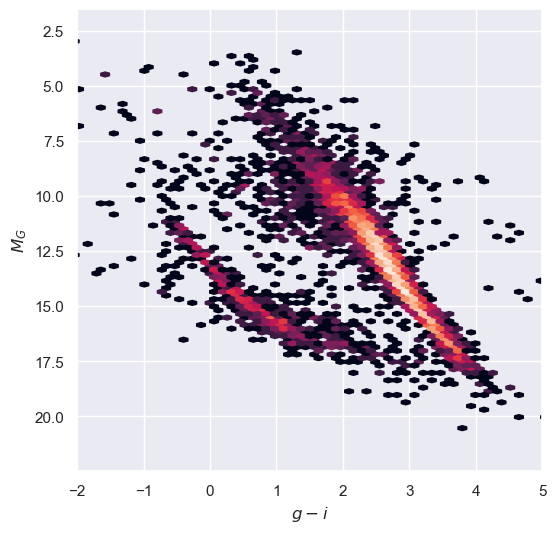

In [14]:
#Trying a different "filter"
#this seems to be using the gunn griz system
#some explanation from google: griz system is defined by a few dozen standard stars, 
#and the star BD+17deg4708, a subdwarf F6 star with B-V=0.43, is defined to have colors equal to zero.
#The absolute calibration of this system is simply the monochromatic flux of the star, 
#scaled from g=9.50 to g=0.0, at the effective wavelengths of the griz bands
#The Gunn-Thuan griz system is employed by the Sloan Digital Sky Survey.
#seems like gaia included the SDSS in their archive and this is where it's coming from
gi = data['gmag_gunn'] - data['imag_gunn']
absmag = data['gmag_gunn'] + 5 * np.log10(data['parallax']) - 10

fig, ax = plt.subplots(1,1, figsize = (6,6))
ax.hexbin(gi[:8000], absmag[:8000], bins = 'log', mincnt = 1)
ax.set_xlabel('$g - i$')
ax.set_ylabel('$M_{G}$')
ax.set_xlim(-2,5)
ax.invert_yaxis()

## Filtering by parallax
d = 1/p

number of stasrs should increase by r^3

stars > 30 parallax ==> stars that are more than 108 light years away

stars < 30 parallax ==> stars that are less than 108 light years away

closest star system to us is alpha Centauri triple-star system which is 4.2 light years away

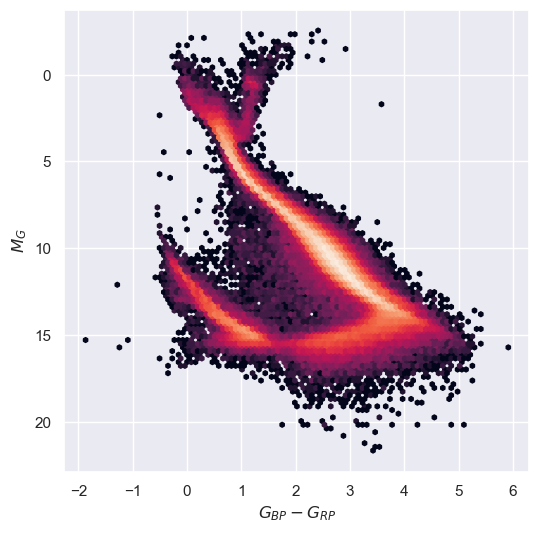

In [17]:
#further stars 
fig, ax = plt.subplots(1,1, figsize = (6,6))
data_parallax = data['parallax'][:] 
bpmag = data['phot_bp_mean_mag']
rpmag = data['phot_rp_mean_mag']
G_bprp = bpmag - rpmag
absmag = data['phot_g_mean_mag'] + 5 * np.log10(data['parallax']) - 10

par_mask = np.zeros(331312, bool)

for i, par in enumerate(data_parallax):
    if par < 30:
        par_mask[i] = True
#         print(par_mask[i])
ax.hexbin(G_bprp[:][par_mask], absmag[:][par_mask], bins = 'log', mincnt = 1)
ax.set_xlabel('$G_{BP} - G_{RP}$')
ax.set_ylabel('$M_{G}$')
ax.invert_yaxis()


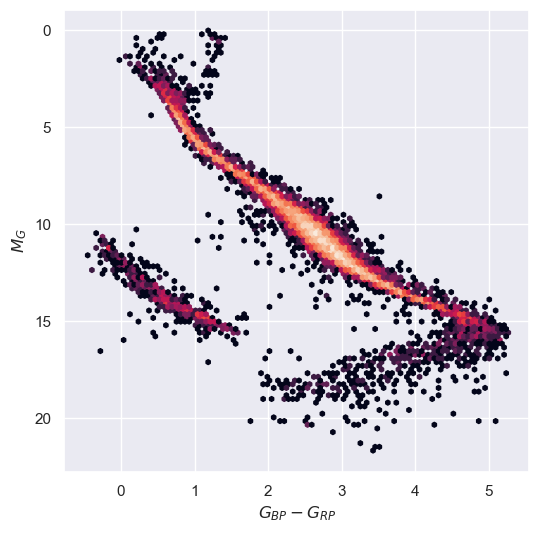

In [29]:
#nearby stars
fig, ax = plt.subplots(1,1, figsize = (6,6))
data_parallax = data['parallax'][:]
bpmag = data['phot_bp_mean_mag']
rpmag = data['phot_rp_mean_mag']
G_bprp = bpmag - rpmag
absmag = data['phot_g_mean_mag'] + 5 * np.log10(data['parallax']) - 10

par_mask = np.zeros(331312, bool)

for i, par in enumerate(data_parallax):
    if par > 30:
        par_mask[i] = True
#         print(par_mask[i])
ax.hexbin(G_bprp[:][par_mask], absmag[:][par_mask], bins = 'log', mincnt = 1)
ax.set_xlabel('$G_{BP} - G_{RP}$')
ax.set_ylabel('$M_{G}$')
ax.invert_yaxis()
